![picture](https://prowly-uploads.s3.eu-west-1.amazonaws.com/uploads/4626/assets/71776/large_logo_wsb_poziom.jpg)

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd /content/gdrive/My Drive/AI_datasets

/content/gdrive/My Drive/AI_datasets


# Podstawy NLP

Co powinniśmy zrobić z tekstem, zanim zaczniemy nad nim pracować?

Usuwanie stopwords: możemy usunąć listę słów pomijanych ze słownictwa angielskiego za pomocą narzędzia nltk. Kilka takich słów to „ja”, „ty”, „a”, „the”, „on”, „który” itp.

Stemming: odnosi się do procesu przycięcia końca lub początku słów z zamiarem usunięcia afiksów (prefix/sufix).

Lematyzacja: Jest to proces redukowania słowa do jego formy podstawowej

wyliczenia->liczyć

Tokenizacja, czyli podział zdania na pojedyncze słowa lub n-gramy (zestawy słów - dwójki, trójki itd)

## Przykład - Latent Dirichlet Allocation (LDA)

In [ ]:
import nltk
nltk.download('stopwords')
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

In [ ]:

from gensim.utils import simple_preprocess

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import spacy

In [ ]:

import gensim.corpora as corpora

In [ ]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Convert to list 
data = df.OriginalTweet.sample(1000).values.tolist()  
# Remove Emails 
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]  
# Remove new line characters 
data = [re.sub('\s+', ' ', sent) for sent in data]  
# Remove distracting single quotes 
data = [re.sub("\'", "", sent) for sent in data]  

In [ ]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
data_words = list(sent_to_words(data))

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
print(trigram_mod[bigram_mod[data_words[0]]])

['believe', 'this', 'snapshot', 'of', 'the', 'open', 'windows', 'in', 'my', 'phone', 'browser', 'sums', 'me', 'up', 'as', 'person', 'internal', 'comms', 'online_shopping', 'doom', 'and', 'murder', 'share', 'yours', 'below', 'isolationgames', 'covid_', 'https', 'co', 'yihhcpevxu']


In [ ]:

from nltk.corpus import stopwords # importowanie stopwords
stop=stopwords.words('english')

In [ ]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
!python3 -m spacy download en_core_web_sm

2023-05-30 19:47:32.311729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
print(data_lemmatized[:1])

[['believe', 'open', 'window', 'phone', 'browser', 'sum', 'person', 'internal', 'comms', 'online_shopping', 'doom', 'murder', 'share', 'isolationgame']]


In [ ]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the keyword of topics
print(lda_model.print_topics())

[(0, '0.056*"food" + 0.055*"covid" + 0.049*"supermarket" + 0.044*"go" + 0.036*"people" + 0.031*"need" + 0.031*"coronavirus" + 0.025*"get" + 0.021*"help" + 0.018*"time"'), (1, '0.044*"coronavirus" + 0.039*"price" + 0.033*"covid" + 0.023*"toiletpaper" + 0.018*"online" + 0.017*"market" + 0.017*"right" + 0.016*"outbreak" + 0.015*"day" + 0.014*"spread"'), (2, '0.038*"think" + 0.027*"shopping" + 0.027*"report" + 0.022*"face" + 0.022*"safe" + 0.022*"mask" + 0.020*"employee" + 0.015*"available" + 0.015*"wash" + 0.014*"wipe"'), (3, '0.037*"worker" + 0.030*"staff" + 0.020*"delivery" + 0.019*"find" + 0.018*"grocery_store" + 0.016*"line" + 0.016*"local" + 0.015*"thing" + 0.015*"try" + 0.012*"week"'), (4, '0.021*"coronaviru" + 0.020*"drive" + 0.019*"look" + 0.017*"impact" + 0.015*"hand_sanitizer" + 0.015*"consumer" + 0.014*"supply" + 0.014*"order" + 0.014*"continue" + 0.013*"re"'), (5, '0.050*"store" + 0.022*"retail" + 0.020*"today" + 0.019*"run" + 0.019*"make" + 0.015*"leave" + 0.014*"year" + 0.01

In [ ]:

doc_lda = lda_model[corpus]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.327106  0.019712       1        1  21.844367
6      0.120113 -0.224071       2        1  16.726466
1      0.068618  0.239397       3        1  12.935263
3     -0.033151 -0.067375       4        1   8.604538
5     -0.082575 -0.067173       5        1   8.536259
7     -0.033929  0.082696       6        1   8.438216
4     -0.066512  0.016845       7        1   6.735131
9     -0.102196 -0.043861       8        1   6.669682
2     -0.109969  0.020578       9        1   5.147032
8     -0.087506  0.023252      10        1   4.363045, topic_info=             Term        Freq       Total Category  logprob  loglift
91           food  177.000000  177.000000  Default  30.0000  30.0000
57          price  155.000000  155.000000  Default  29.0000  29.0000
111   supermarket  160.000000  160.000000  Default  28.0000  28.0000
92             go  139.000000  139.000000  Default  27.0000  27.0000
19       consumer  131.000000  131.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1448          bad    9.065177   12.337289  Topic10  -4.2456   2.8238
173           day   12.425979   40.674553  Topic10  -3.9303   1.9462
269    quarantine    8.018426   19.443089  Topic10  -4.3683   2.2463
84       shopping    8.554566   29.382674  Topic10  -4.3036   1.8981
97          panic    5.384672   32.523417  Topic10  -4.7665   1.3336

[418 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
744       4  0.822073          _
677       5  0.862486       able
678       5  0.942737     action
2324      2  0.953264      adapt
1266     10  0.941298  advantage
...     ...       ...        ...
292       4  0.868643     worker
292       8  0.129372     worker
233       2  0.959637      world
1281      6  0.894829      worry
727       5  0.979975       year

[435 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 2, 4, 6, 8, 5, 10, 3, 9])

# Wektoryzacja tekstu

Komputery rozumieją tylko język liczb. Sposób, w jaki kodujemy nasze dane tekstowe na liczby, ma duży wpływ na wynik. Ogólnie istnieją 3 techniki, które są wykorzystywane do wykonania tego zadania.
* Bag of words
* Tf-Idf
* Word2Vec

Spośród nich word2vec spisuje się niesamowicie dobrze w zadaniach NLP. Podstawowa idea koncepcji jest bardzo prosta, ale daje świetne rezultaty.

## Word2vec

![picture](https://www.samyzaf.com/ML/nlp/word2vec2.png)

Podstawowa idea algorytmu polega na rozpoznawaniu słów blisko siebie. Innymi słowy, jeśli komputer nauczy się, że słowa "nudna" i "praca" występują blisko siebie, nauczy się również tworzyć ich wektorowe reprezentacje w taki sposób, aby również były powiązane.

Jeśli przyjrzymy się słowu "nudny" jako naszemu docelowemu słowu, dla którego chcemy nauczyć się odpowiedniego wektora, dostarczamy komputerowi słowo kontekstowe lub pobliskie słowa, takie jak "praca".

Istnieją dwie główne architektury, które próbują nauczyć się powyższego. Skip gram i CBOW


Skip-gram : Ten model próbuje nauczyć się słów kontekstu dla każdego ze słów docelowych.

![picture](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ygnAlYq2zMy9SrJl0GfdPA.png)

Idea jest taka, że dla każdego słowa uznanego jako "target" dobieramy słowa kontekstu. Warstwa ukryta będzie odpowiadała za ukrytą wymiarowość zbioru danych. Na podstawie tej warstwy wyliczane są prawdopodobieństwa wystąpienia słów kontekstu wraz ze słowem "target".

Input layer przyjmuje słowa w postaci ohe oraz zwraca słowa w postaci ohe.

Zalety:
* Jest to uczenie się bez nadzoru, dlatego może pracować na dowolnym surowym tekście.
* Wymaga mniej pamięci w porównaniu z innymi słowami do reprezentacji wektorowych.
* Wymaga dwóch macierzy wag o wymiarze [N, |v|] każda zamiast [|v|, |v|]. I zwykle N wynosi około 300, podczas gdy |v| jest w milionach. Widzimy więc zaletę stosowania tego algorytmu.

Wady:
* Znalezienie najlepszej wartości dla N i c jest trudne.
* Funkcja Softmax jest kosztowna obliczeniowo.
* Czas potrzebny do nauczenia tego algorytmu jest długi.

W Continuous Bag of Words (CBOW) algorytm jest bardzo podobny, ale wykonuje odwrotną operację. Na podstawie słów kontekstu chcemy, aby nasz model przewidział główne słowo

![picture](https://lilianweng.github.io/posts/2017-10-15-word-embedding/word2vec-cbow.png)

Podobnie jak w Skip-Gram mamy warstwę wejściową (która teraz składa się ze słów kontekstowych w kodowaniu one-hot – rozmiar 1xV). Dla każdego słowa kontekstu otrzymujemy warstwę ukrytą wynikającą z macierzy wag. Następnie uśredniamy je do pojedynczej warstwy ukrytej, która jest przekazywana do warstwy wyjściowej. Model uczy się przewidywać główne słowo, modyfikując macierze wag.

Ponownie, po zakończeniu szkolenia, używamy macierzy wag do wygenerowania osadzonych słów z kodowania one-hot.

Pokazano, że Skip-Gram działa dobrze z małymi zbiorami danych i może lepiej reprezentować rzadsze słowa.

Jednak okazuje się, że CBOW trenuje szybciej niż Skip-Gram i może lepiej reprezentować częstsze słowa

Jak taki model sobie radzi? [Ano tak](http://projector.tensorflow.org/?_gl=1*lpq4i3*_ga*MjE0MzY1MjkyNC4xNjg0MDgzMzc0*_ga_W0YLR4190T*MTY4NTI5OTQ5My4xMS4xLjE2ODUzMDAxNDYuMC4wLjA.)!

https://www.tensorflow.org/tutorials/text/word2vec

http://jalammar.github.io/illustrated-word2vec/

https://github.com/stanfordnlp/GloVe

In [ ]:
import gensim
from gensim.models import Word2Vec

https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api
# wv = api.load('word2vec-google-news-300') Prawie 2gb, nie uda nam się na zajęciach niestety

In [ ]:
glove_wiki_gigaword = api.load('glove-wiki-gigaword-50')

In [ ]:
glove_wiki_gigaword.most_similar('lawyer')

[('attorney', 0.8797950148582458),
 ('judge', 0.8155649304389954),
 ('lawyers', 0.7819620370864868),
 ('colleague', 0.770877480506897),
 ('counsel', 0.7696930170059204),
 ('prosecutor', 0.7580638527870178),
 ('testified', 0.7470369935035706),
 ('justice', 0.745328962802887),
 ('attorneys', 0.743457555770874),
 ('court', 0.7412557601928711)]

In [ ]:
glove_wiki_gigaword.distance('lawyer','king')

0.6057234406471252

In [ ]:
glove_wiki_gigaword.similarity('lawyer','king')

0.39427656

In [ ]:
glove_wiki_gigaword.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car'])

'car'

In [ ]:
glove_wiki_gigaword.get_vector('king')

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [ ]:
glove_wiki_gigaword.similar_by_vector(glove_wiki_gigaword.get_vector('king'))

[('king', 1.0000001192092896),
 ('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542161345481873),
 ('throne', 0.7539914846420288),
 ('brother', 0.7492411136627197)]

In [ ]:
glove_wiki_gigaword.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

## Case study - analiza utworów muzycznych

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/AI_datasets/Lyrics

/content/gdrive/My Drive/AI_datasets/Lyrics


In [ ]:
!ls

'Backstreet Boys'    glove.6B.50d.txt  'Led Zeppelin'
 glove.6B.100d.txt   glove.6B.zip      'Snoop Dog'


In [ ]:
led_zeppelin = []
for file in os.listdir('Led Zeppelin'):
  with open('Led Zeppelin/'+file,  encoding="ISO-8859-1") as g :
    led_zeppelin.append(g.read())

In [ ]:
backstreet_boys = []
for file in os.listdir('Backstreet Boys'):
  with open('Backstreet Boys/'+file,  encoding="ISO-8859-1") as g :
    backstreet_boys.append(g.read())

In [ ]:
snoop_dog = []
for file in os.listdir('Snoop Dog'):
  with open('Snoop Dog/'+file,  encoding="ISO-8859-1") as g :
    snoop_dog.append(g.read())

In [ ]:
import nltk #importowanie biblioteki nltk(Natural Language Toolkit)
nltk.download('stopwords') # ściąganie z biblioteki nltk stopwords
from nltk.corpus import stopwords # importowanie stopwords
import re # importowanie biblioteki pozwalającej na wyszukiwanie określonych symboli w tekście
from nltk.tokenize import word_tokenize #importowanie biblioteki pozwalającej na tokenizacje na słowa
from nltk.probability import FreqDist #import biblioteki FreqDist z pakietu nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop=stopwords.words('english') # wczytanie z biblioteki stopwords i zapisanie do zmiennej "stop"
stop.append("n't")#dodanie do zmiennej "stop" elementu "n't"
stop=stop+["m","'m","'s'","im",'x'] #dodanie do zmiennej "stop" kolejnych elementów

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [ ]:
led_zeppelin = [d.replace('\n',' ') for d in led_zeppelin]
backstreet_boys = [d.replace('\n',' ') for d in backstreet_boys]
snoop_dog = [d.replace('\n',' ') for d in snoop_dog]

In [ ]:
stopwords_backstreet_boys = []
words_backstreet_boys = []
unique_backstreet_boys = []
for i in range(len(backstreet_boys)) :
  stopwords_backstreet_boys.append(len([d for d in backstreet_boys[i].split() if d in stop])) 
  words_backstreet_boys.append(len([d for d in backstreet_boys[i].split()]))
  unique_backstreet_boys.append(sum([backstreet_boys[i].count(word) for word in backstreet_boys[i].split() if  backstreet_boys[i].count(word)==1]))
print('Srednia ilość stopwords na piosenkę : ' + str(sum(stopwords_backstreet_boys) / len(backstreet_boys)))
print('Srednia udział stopwords w tekście piosenek : ' + str(sum(stopwords_backstreet_boys) / sum(words_backstreet_boys)))
print('Srednia ilość wszystkich słów na piosenkę : ' + str(sum(words_backstreet_boys) / len(backstreet_boys)))
print('Srednia ilość unikalnych słów na piosenkę : ' + str(sum(unique_backstreet_boys) / len(backstreet_boys)))
print('Srednia udział unikalnych słów w tekście piosenek : ' + str(sum(unique_backstreet_boys) / sum(words_backstreet_boys)))

Srednia ilość stopwords na piosenkę : 121.52777777777777
Srednia udział stopwords w tekście piosenek : 0.37319798686343086
Srednia ilość wszystkich słów na piosenkę : 325.6388888888889
Srednia ilość unikalnych słów na piosenkę : 49.666666666666664
Srednia udział unikalnych słów w tekście piosenek : 0.15252068583127185


In [ ]:
stopwords_led_zeppelin = []
words_led_zeppelin = []
unique_led_zeppelin = []
for i in range(len(led_zeppelin)) :
  stopwords_led_zeppelin.append(len([d for d in led_zeppelin[i].split() if d in stop])) 
  words_led_zeppelin.append(len([d for d in led_zeppelin[i].split()]))
  unique_led_zeppelin.append(sum([led_zeppelin[i].count(word) for word in led_zeppelin[i].split() if  led_zeppelin[i].count(word)==1]))
print('Srednia ilość stopwords na piosenkę : ' + str(sum(stopwords_led_zeppelin) / len(led_zeppelin)))
print('Srednia udział stopwords w tekście piosenek : ' + str(sum(stopwords_led_zeppelin) / sum(words_led_zeppelin)))
print('Srednia ilość wszystkich słów na piosenkę : ' + str(sum(words_led_zeppelin) / len(led_zeppelin)))
print('Srednia ilość unikalnych słów na piosenkę : ' + str(sum(unique_led_zeppelin) / len(led_zeppelin)))
print('Srednia udział unikalnych słów w tekście piosenek : ' + str(sum(unique_led_zeppelin) / sum(words_led_zeppelin)))

Srednia ilość stopwords na piosenkę : 77.79411764705883
Srednia udział stopwords w tekście piosenek : 0.3440426638917794
Srednia ilość wszystkich słów na piosenkę : 226.11764705882354
Srednia ilość unikalnych słów na piosenkę : 64.94117647058823
Srednia udział unikalnych słów w tekście piosenek : 0.28720083246618106


In [ ]:
stopwords_snoop_dog = []
words_snoop_dog = []
unique_snoop_dog = []
for i in range(len(snoop_dog)) :
  stopwords_snoop_dog.append(len([d for d in snoop_dog[i].split() if d in stop])) 
  words_snoop_dog.append(len([d for d in snoop_dog[i].split()]))
  unique_snoop_dog.append(sum([snoop_dog[i].count(word) for word in snoop_dog[i].split() if  snoop_dog[i].count(word)==1]))
print('Srednia ilość stopwords na piosenkę : ' + str(sum(stopwords_snoop_dog) / len(snoop_dog)))
print('Srednia udział stopwords w tekście piosenek : ' + str(sum(stopwords_snoop_dog) / sum(words_snoop_dog)))
print('Srednia ilość wszystkich słów na piosenkę : ' + str(sum(words_snoop_dog) / len(snoop_dog)))
print('Srednia ilość unikalnych słów na piosenkę : ' + str(sum(unique_snoop_dog) / len(snoop_dog)))
print('Srednia udział unikalnych słów w tekście piosenek : ' + str(sum(unique_snoop_dog) / sum(words_snoop_dog)))

Srednia ilość stopwords na piosenkę : 206.11428571428573
Srednia udział stopwords w tekście piosenek : 0.35260765433305635
Srednia ilość wszystkich słów na piosenkę : 584.5428571428571
Srednia ilość unikalnych słów na piosenkę : 178.14285714285714
Srednia udział unikalnych słów w tekście piosenek : 0.3047558531697541


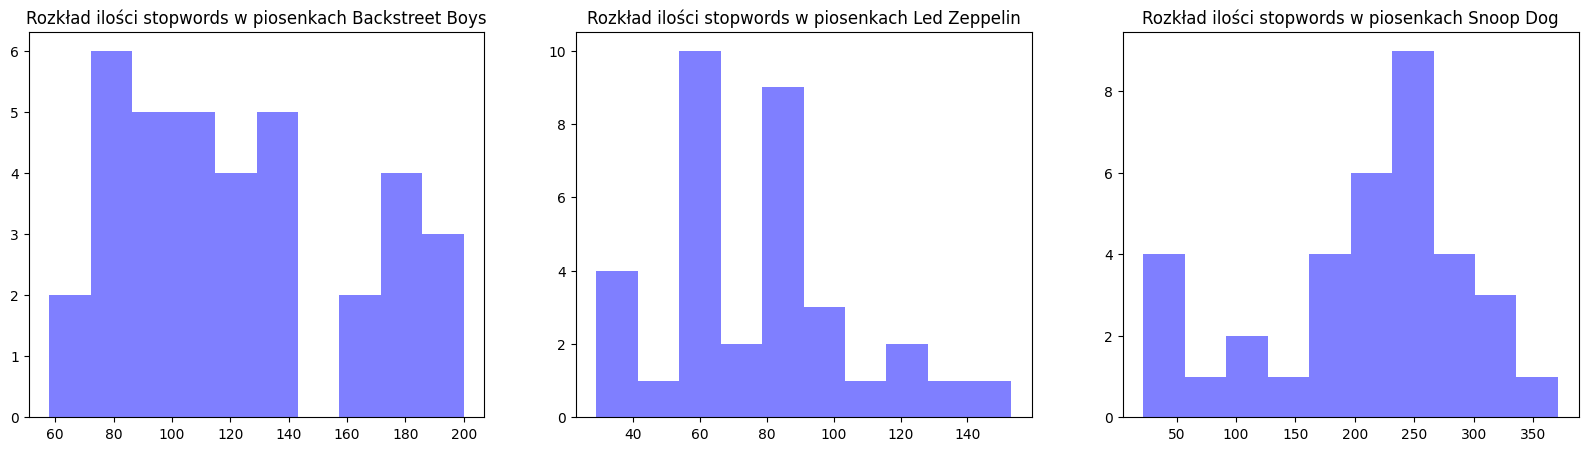

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(131)
plt.hist(stopwords_backstreet_boys, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości stopwords w piosenkach Backstreet Boys')
plt.subplot(132)
plt.hist(stopwords_led_zeppelin, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości stopwords w piosenkach Led Zeppelin')
plt.subplot(133)
plt.hist(stopwords_snoop_dog, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości stopwords w piosenkach Snoop Dog')
plt.show()

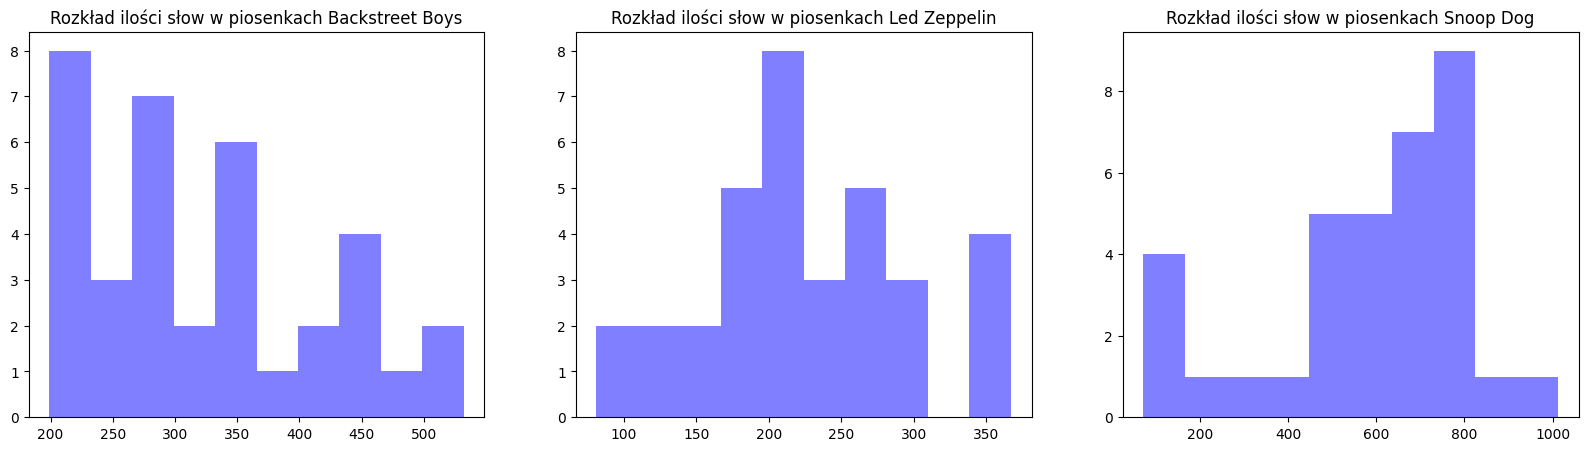

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(131)
plt.hist(words_backstreet_boys, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości słow w piosenkach Backstreet Boys')
plt.subplot(132)
plt.hist(words_led_zeppelin, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości słow w piosenkach Led Zeppelin')
plt.subplot(133)
plt.hist(words_snoop_dog, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości słow w piosenkach Snoop Dog')
plt.show()

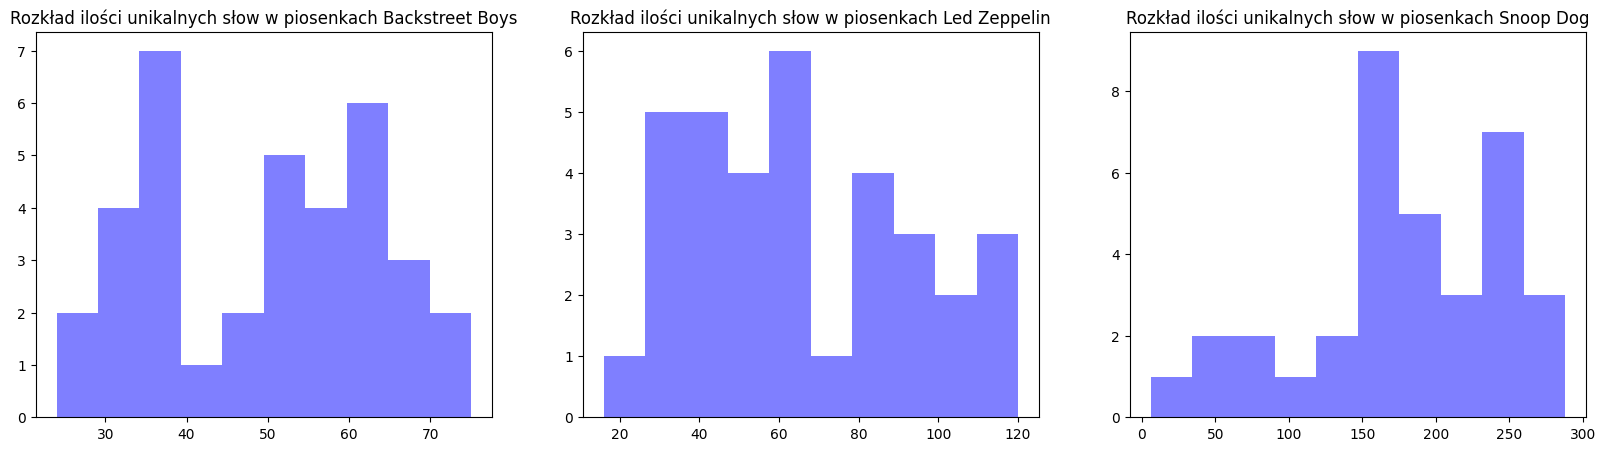

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(131)
plt.hist(unique_backstreet_boys, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości unikalnych słow w piosenkach Backstreet Boys')
plt.subplot(132)
plt.hist(unique_led_zeppelin, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości unikalnych słow w piosenkach Led Zeppelin')
plt.subplot(133)
plt.hist(unique_snoop_dog, 10, facecolor='blue', alpha=0.5)
plt.title('Rozkład ilości unikalnych słow w piosenkach Snoop Dog')
plt.show()

In [ ]:
import re # importowanie biblioteki pozwalającej na wyszukiwanie określonych symboli w tekście
from nltk.tokenize import word_tokenize #importowanie biblioteki pozwalającej na tokenizacje na słowa
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clear_song(song) :
  song = song.lower() # zmiana tekstu na małe litery
  song = re.sub('[^\w\s]',"",song) # usuwnaie interpunkcji z tekstu
  song = re.sub(r"\d+","",song)# usuwanie liczb z tekstu
  token = song.split()
  token = [t for t in token if t not in stop and t != ''] #usuwanie stopwords
  pst = PorterStemmer()
  token = [pst.stem(t) for t in token]
  lemmatizer = WordNetLemmatizer()
  token = [lemmatizer.lemmatize(t) for t in token]

  return token

In [ ]:
def clear_wo_tokens(song) : 
  song = song.lower() # zmiana tekstu na małe litery
  song = re.sub('[^\w\s]',"",song) # usuwnaie interpunkcji z tekstu
  song = re.sub(r"\d+","",song)# usuwanie liczb z tekstu
  return song

In [ ]:
#Importowanie potrzebnych bibliotek do stworzenia chmury słów
import wordcloud
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS 
from PIL import Image

In [ ]:
led_zeppelin = [clear_wo_tokens(song) for song in led_zeppelin]
led_zeppelin_all_text = ''.join([w for w in led_zeppelin])
backstreet_boys = [clear_wo_tokens(song) for song in backstreet_boys]
backstreet_boys_all_text = ''.join([w for w in backstreet_boys])
snoop_dog = [clear_wo_tokens(song) for song in snoop_dog]
snoop_dog_all_text = ''.join([w for w in snoop_dog])

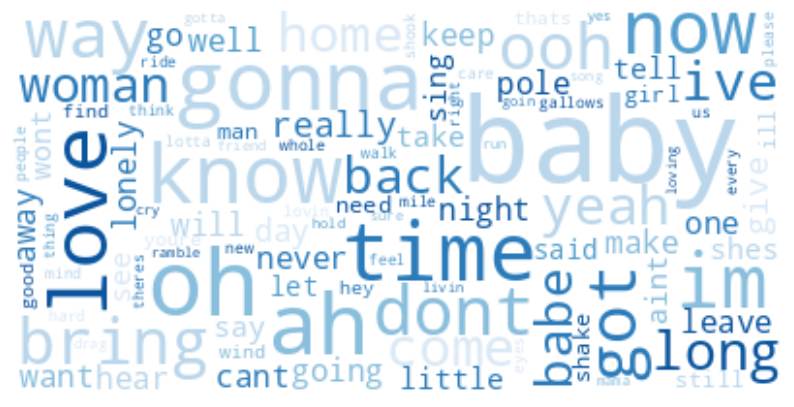

In [ ]:
%matplotlib inline

color=ListedColormap(sns.color_palette("Blues").as_hex())


wc=WordCloud(background_color='white', max_words=100, 
             max_font_size=60, colormap=color,collocations=False) 

wc.generate(led_zeppelin_all_text)
plt.figure(figsize=[10,10]) 
plt.imshow(wc,interpolation="bilinear")
plt.axis("off");

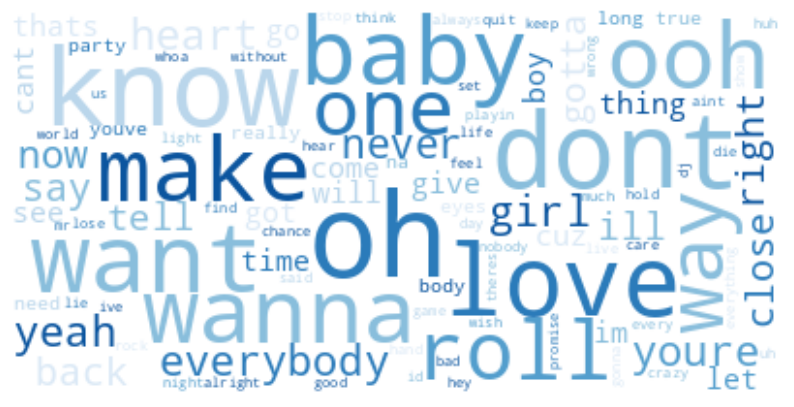

In [ ]:
%matplotlib inline
color=ListedColormap(sns.color_palette("Blues").as_hex())

wc=WordCloud(background_color='white', max_words=100, 
             max_font_size=60, colormap=color,collocations=False) 

wc.generate(backstreet_boys_all_text)
plt.figure(figsize=[10,10]) 
plt.imshow(wc,interpolation="bilinear")
plt.axis("off"); 

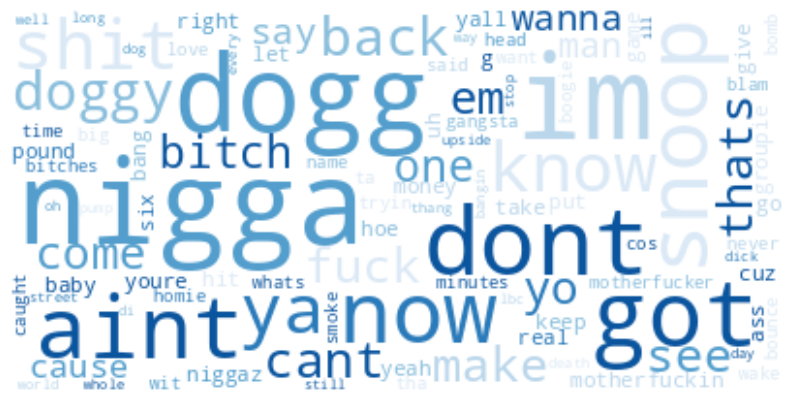

In [ ]:
%matplotlib inline
color=ListedColormap(sns.color_palette("Blues").as_hex())

wc=WordCloud(background_color='white', max_words=100, 
             max_font_size=60, colormap=color,collocations=False) 

wc.generate(snoop_dog_all_text)
plt.figure(figsize=[10,10]) 
plt.imshow(wc,interpolation="bilinear")
plt.axis("off");

In [ ]:
glove_wiki_gigaword.get_mean_vector(['king','queen','dsadsa'])

array([ 0.08338453,  0.2393884 , -0.17715496, -0.01216406,  0.09036113,
        0.04524319, -0.02508591,  0.12473339, -0.06296103, -0.10183258,
        0.01470665,  0.23382452,  0.05515729, -0.12158523,  0.09128003,
        0.12996155, -0.12284032, -0.02243097, -0.10719926,  0.08234271,
        0.07377672,  0.02468947, -0.02278362, -0.00125753,  0.06539849,
       -0.38063926, -0.20040712, -0.1188569 , -0.08527973,  0.02592026,
        0.33534414,  0.03389832, -0.08366866,  0.09914876,  0.08941473,
        0.03122089,  0.0824675 , -0.03064121, -0.15992674, -0.08397426,
        0.08154824,  0.13307093, -0.11148165, -0.09075442, -0.03338069,
        0.09546255, -0.13889626, -0.36974972, -0.05904385, -0.10553173],
      dtype=float32)

In [ ]:
glove_wiki_gigaword.get_mean_vector(['king','queen'])

array([ 0.08338453,  0.2393884 , -0.17715496, -0.01216406,  0.09036113,
        0.04524319, -0.02508591,  0.12473339, -0.06296103, -0.10183258,
        0.01470665,  0.23382452,  0.05515729, -0.12158523,  0.09128003,
        0.12996155, -0.12284032, -0.02243097, -0.10719926,  0.08234271,
        0.07377672,  0.02468947, -0.02278362, -0.00125753,  0.06539849,
       -0.38063926, -0.20040712, -0.1188569 , -0.08527973,  0.02592026,
        0.33534414,  0.03389832, -0.08366866,  0.09914876,  0.08941473,
        0.03122089,  0.0824675 , -0.03064121, -0.15992674, -0.08397426,
        0.08154824,  0.13307093, -0.11148165, -0.09075442, -0.03338069,
        0.09546255, -0.13889626, -0.36974972, -0.05904385, -0.10553173],
      dtype=float32)

In [ ]:
all_clear_songs = [backstreet_boys,led_zeppelin,snoop_dog]
all_clear_songs = np.concatenate([list(p) for p in all_clear_songs])

In [ ]:
backstreet_boys_vecs = [glove_wiki_gigaword.get_mean_vector(song.split(' ')) for song in backstreet_boys]

In [ ]:
backstreet_boys_vecs.__len__()

36

In [ ]:
backstreet_boys_vecs[0]

array([ 2.45224424e-02, -3.40108178e-03,  2.50575859e-02, -5.60976267e-02,
        4.75113988e-02, -3.76461484e-02, -8.88333693e-02,  8.58843420e-03,
       -3.35223898e-02,  3.40919830e-02, -2.89286263e-02,  3.63405421e-02,
       -8.21774900e-02,  8.47671367e-03,  1.01936206e-01,  5.69871068e-02,
        5.18201441e-02,  2.26074510e-04, -3.58282663e-02, -9.33945328e-02,
       -1.30247343e-02,  5.46057373e-02,  8.02967101e-02,  2.19225157e-02,
        7.06911683e-02, -2.77081519e-01, -8.24770480e-02,  5.78739122e-02,
        1.04034781e-01, -1.18852869e-01,  5.76345563e-01,  7.08606765e-02,
       -5.89675978e-02,  2.38380558e-03, -2.42708791e-02, -1.50728012e-02,
        3.22826244e-02,  1.10895196e-02,  3.43605876e-02, -5.02239726e-02,
       -3.27903107e-02,  3.14533850e-03, -2.53124721e-02,  4.04809378e-02,
       -1.22441035e-02,  7.29316380e-03, -2.51502055e-03, -4.53942791e-02,
       -1.73334870e-02,  2.38213241e-02], dtype=float32)

In [ ]:
led_zeppelin_vecs = [glove_wiki_gigaword.get_mean_vector(song.split(' ')) for song in led_zeppelin]
snoop_dog_vecs = [glove_wiki_gigaword.get_mean_vector(song.split(' ')) for song in snoop_dog]

## Grupowanie tekstu

In [ ]:
grouping_data = np.vstack([backstreet_boys_vecs,led_zeppelin_vecs,snoop_dog_vecs])

In [ ]:
grouping_data.shape

(105, 50)

In [ ]:
titles = []
titles.append(os.listdir('Led Zeppelin'))
titles.append(os.listdir('Backstreet Boys'))
titles.append(os.listdir('Snoop Dog'))

In [ ]:
titles = [item for sublist in titles for item in sublist]

In [ ]:
titles = [title.replace('.txt','') for title in titles]

In [ ]:
autors = [np.repeat("Led Zeppelin",len(os.listdir('Led Zeppelin'))).tolist(),np.repeat("Backstreet Boys",len(os.listdir('Backstreet Boys'))).tolist(),np.repeat("Snoop Dog",len(os.listdir('Snoop Dog'))).tolist()]

In [ ]:
autors = [autor for sublist in autors for autor in sublist]

In [ ]:
author_to_color = {'Backstreet Boys': 'chocolate',
                   'Led Zeppelin': 'steelblue',
                   'Snoop Dog': 'dimgray'}
color = [author_to_color[yy] for yy in autors]

In [ ]:
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=e9a3a897a80f490dd57216d58d08a79dc9d470a8a8638d892387bbf43bd02e6b
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
import plotly.graph_objects as go

In [ ]:
import plotly.graph_objects as go

In [ ]:
map_dim = 6
som = MiniSom(map_dim, map_dim, 50, learning_rate=0.2, sigma=1, random_seed=1, topology= 'hexagonal')
som.pca_weights_init(grouping_data)

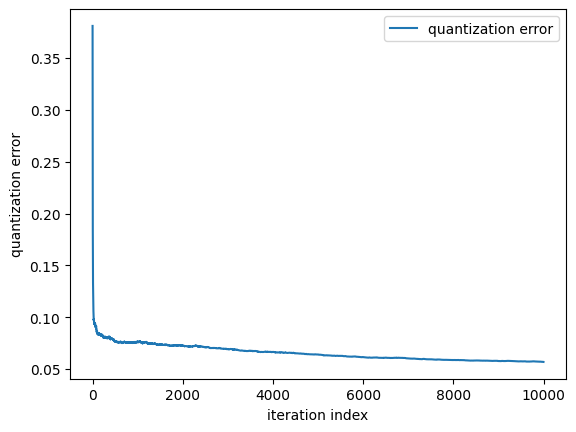

In [ ]:
max_iter = 10000
q_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(grouping_data))
    som.update(grouping_data[rand_i], som.winner(grouping_data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(grouping_data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

In [ ]:
som.quantization_error(grouping_data)

0.05679812794459081

In [ ]:
def plot_som(data_to_SOM,som):
  fig = go.Figure(data=go.Scatter(
      x=som.get_euclidean_coordinates()[0].flatten(),
      y=som.get_euclidean_coordinates()[1].flatten(),
      mode='markers',
      hovertext=pd.Series(som.activation_response(data_to_SOM).flatten()),
      text = som.distance_map().flatten(),
      hovertemplate=
      "BMU dla %{hovertext:,.0f} obserwacji<br>" +
      "Średni dystans od sąsiadów: %{text:,.2f}<br>",
      marker=dict(
          size = 10*som.activation_response(data_to_SOM).flatten(),
          color = som.distance_map().flatten(),
          colorscale = 'Viridis',
  #        line=dict(
  #          color=som.distance_map().flatten(),
  #          width=10,
  #          colorscale = 'Viridis'
  #        ),
          showscale=True,
          colorbar=dict(
                  title='Średni dystans od sąsiada', # title here
                  titleside='right',
                  tickfont = dict(
                      family='Times New Roman',
                      size = 16
                  ),
                  titlefont=dict(
                      size=18,
                      family='Times New Roman')
              ))
          
  ))

  fig.update_layout(
  xaxis = dict(
  showticklabels = False
  ),
  yaxis = dict(
  showticklabels = False
  ),
  autosize=False,
  width=1200,
  height=800,
  paper_bgcolor='rgba(0,0,0,0)',
  plot_bgcolor='rgba(0,0,0,0)'
  )

  fig.show()

In [ ]:
plot_som(grouping_data,som)

[]

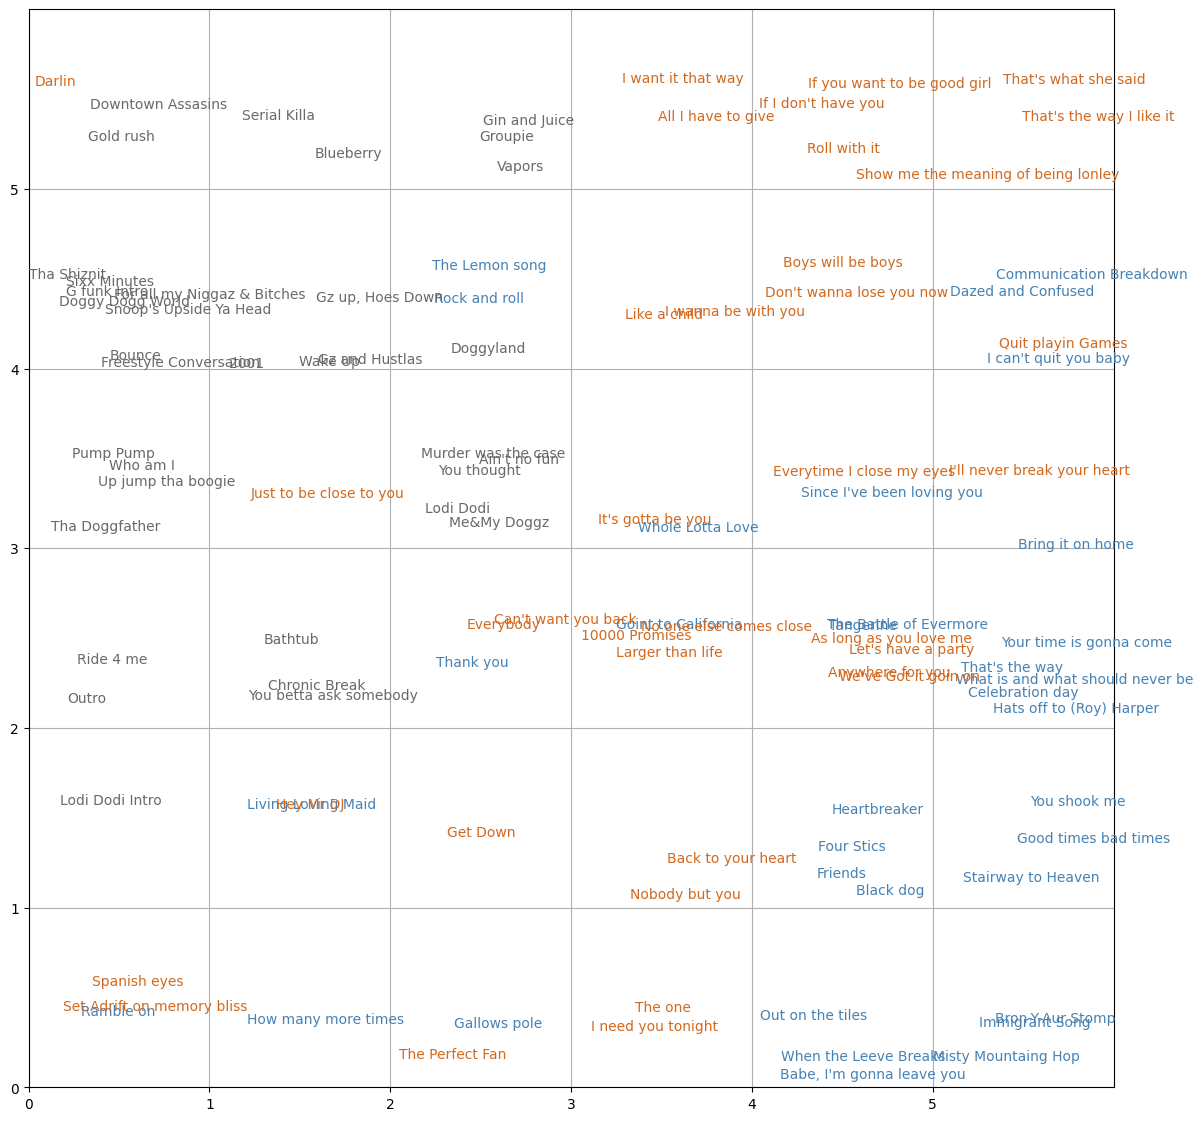

In [ ]:
plt.figure(figsize=(14, 14))
for i, (t, c, vec) in enumerate(zip(titles, color, grouping_data)):
    winnin_position = som.winner(vec)
    plt.text(winnin_position[0]+np.random.rand()*.6, 
             winnin_position[1]+np.random.rand()*.6, 
             t,
             color=c)

plt.xticks(range(map_dim))
plt.yticks(range(map_dim))
plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()

/usr/local/lib/python3.10/dist-packages/minisom.py:536: RuntimeWarning:

invalid value encountered in sqrt



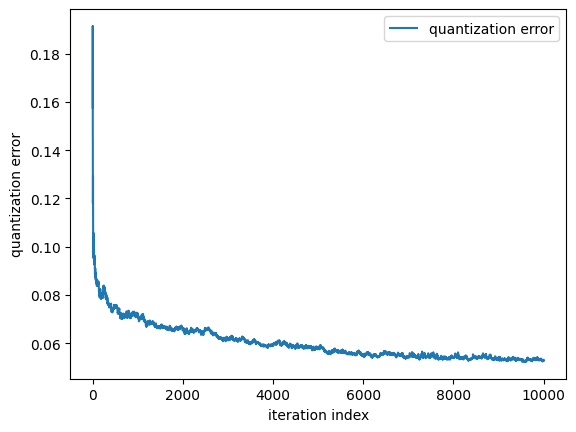

Quantization error 0.0531496451917873


[]

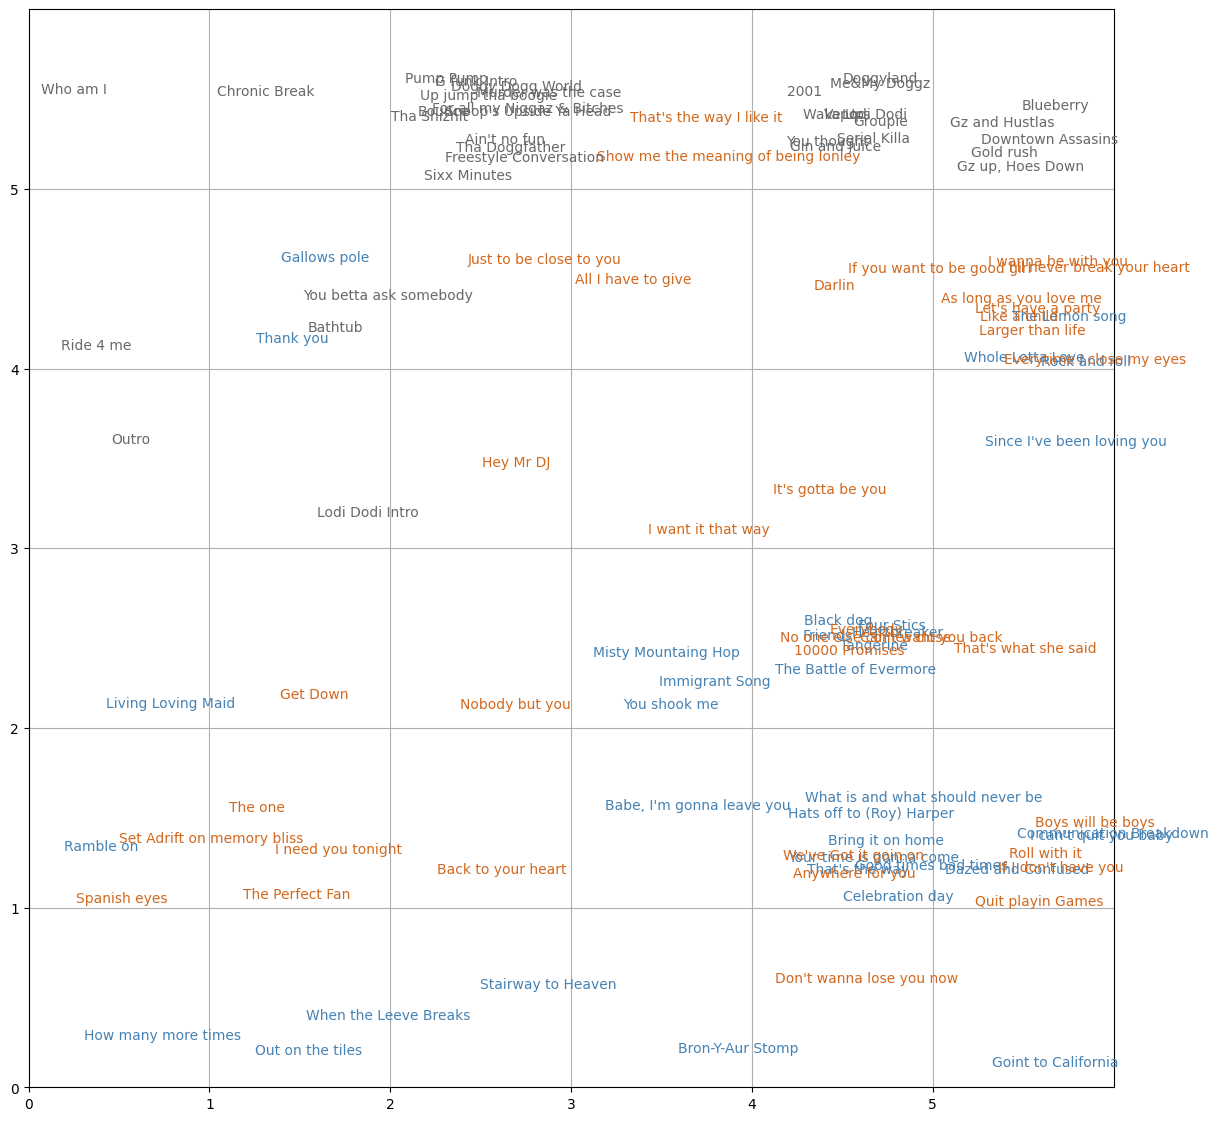

In [ ]:
map_dim = 6
som = MiniSom(map_dim, map_dim, 50, learning_rate=0.8, sigma=0.7, random_seed=1, topology= 'hexagonal')
som.pca_weights_init(grouping_data)
max_iter = 10000
q_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(grouping_data))
    som.update(grouping_data[rand_i], som.winner(grouping_data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(grouping_data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.legend()
plt.show()
print(f'Quantization error {som.quantization_error(grouping_data)}')
plot_som(grouping_data,som)
plt.figure(figsize=(14, 14))
for i, (t, c, vec) in enumerate(zip(titles, color, grouping_data)):
    winnin_position = som.winner(vec)
    plt.text(winnin_position[0]+np.random.rand()*.6, 
             winnin_position[1]+np.random.rand()*.6, 
             t,
             color=c)

plt.xticks(range(map_dim))
plt.yticks(range(map_dim))
plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()

In [39]:
!pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59421 sha256=0ca9d0790e8966adcb59e466bc80b95ce201219dd7788b9d71d90e81399e2c17
  Stored in directory: /root/.cache/pip/wheels/35/c6/63/a3c12ecc9fdea10a593271de5c56481b427ad4049b90a176e1
Successfully built datashape


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=4170ee711938a8b63528718fd8dce24f300304ba0205f33fe15173694852907a
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=051a58319c3ec9e0fa154b0ecea84b9c9d550f828de2f8af3f5678a06b714a99
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import umap
import umap.plot

In [ ]:
import pandas as pd

In [ ]:
mapper = umap.UMAP().fit(grouping_data)

In [ ]:
hover_data = pd.DataFrame({'index':np.arange(len(titles)),
                           'label':autors,
                           'title':titles})

In [ ]:
umap.plot.output_notebook()

In [ ]:
p = umap.plot.interactive(mapper, labels=pd.Series(autors), hover_data=hover_data, point_size=10, color_key_cmap='Paired', background='black')
umap.plot.show(p)

Liczba sąsiadów 5, dystans 0.1


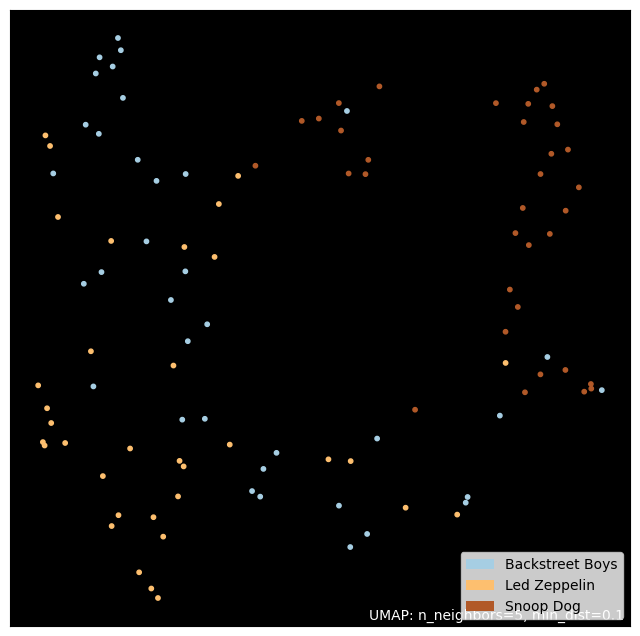

Liczba sąsiadów 5, dystans 0.5


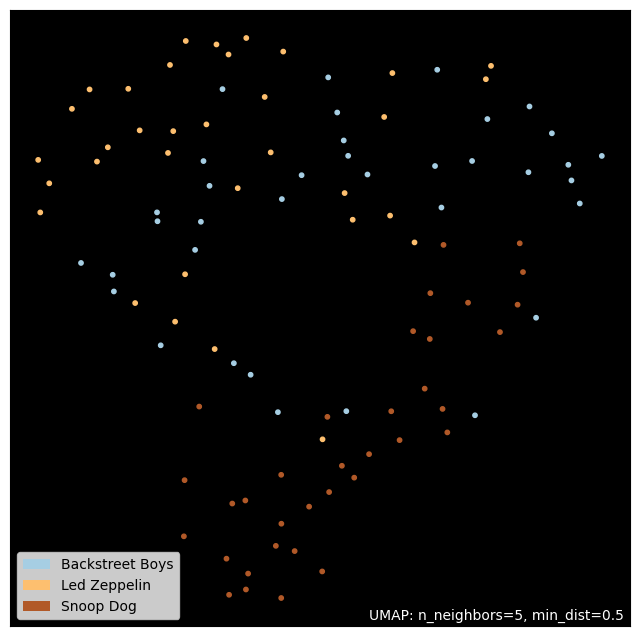

Liczba sąsiadów 5, dystans 0.8


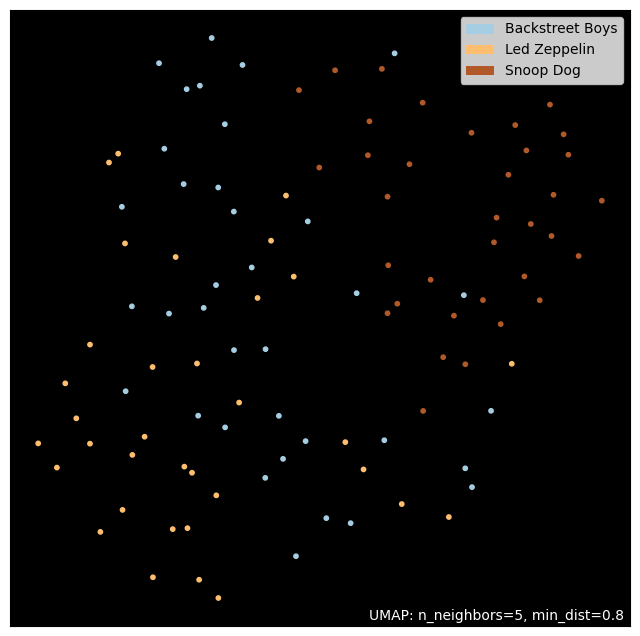

Liczba sąsiadów 15, dystans 0.1


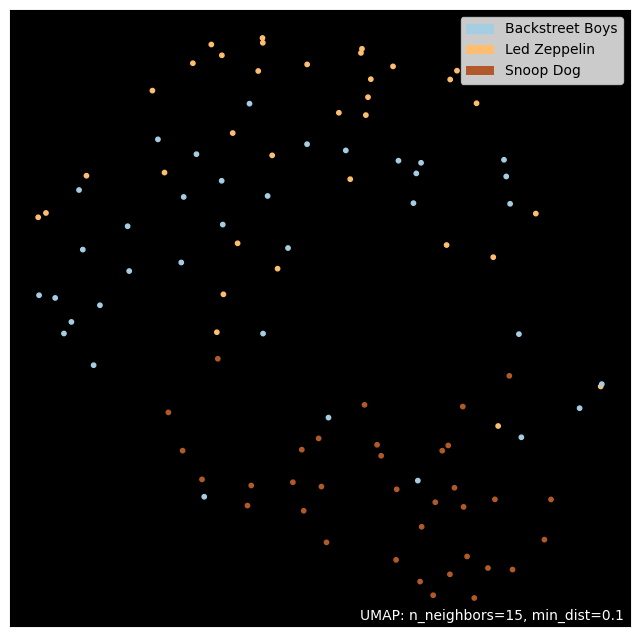

Liczba sąsiadów 15, dystans 0.5


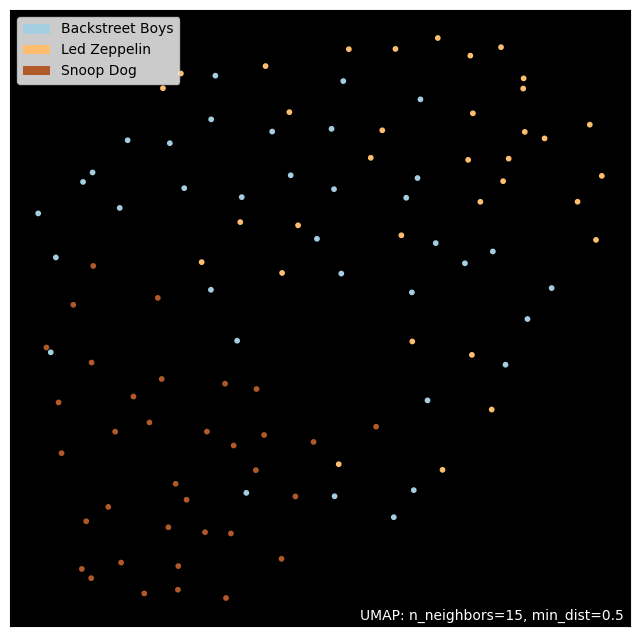

Liczba sąsiadów 15, dystans 0.8


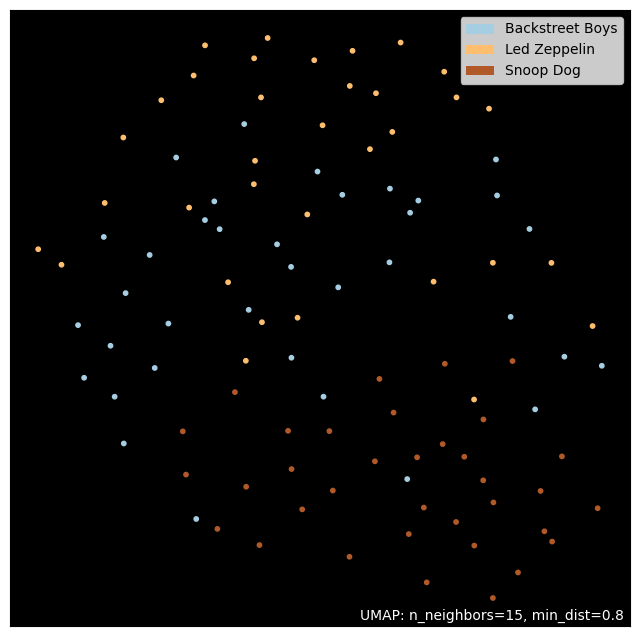

Liczba sąsiadów 50, dystans 0.1


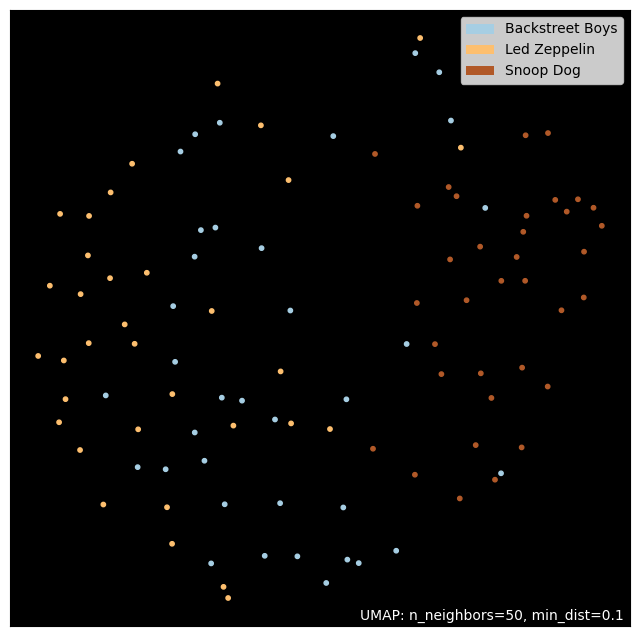

Liczba sąsiadów 50, dystans 0.5


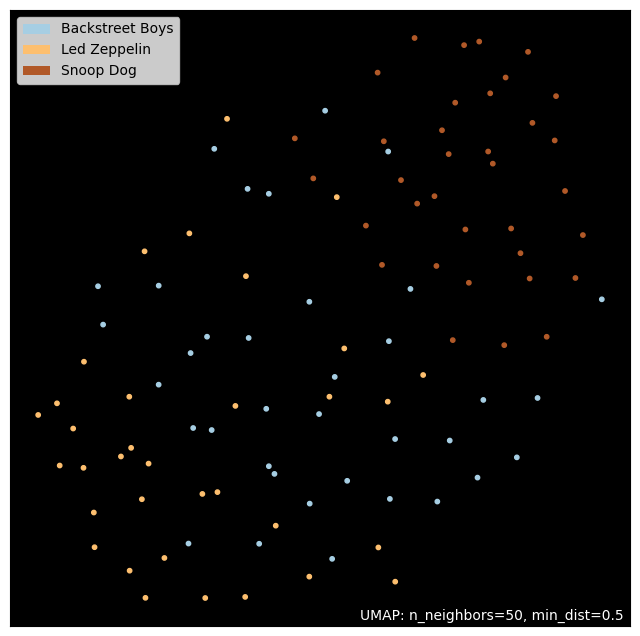

Liczba sąsiadów 50, dystans 0.8


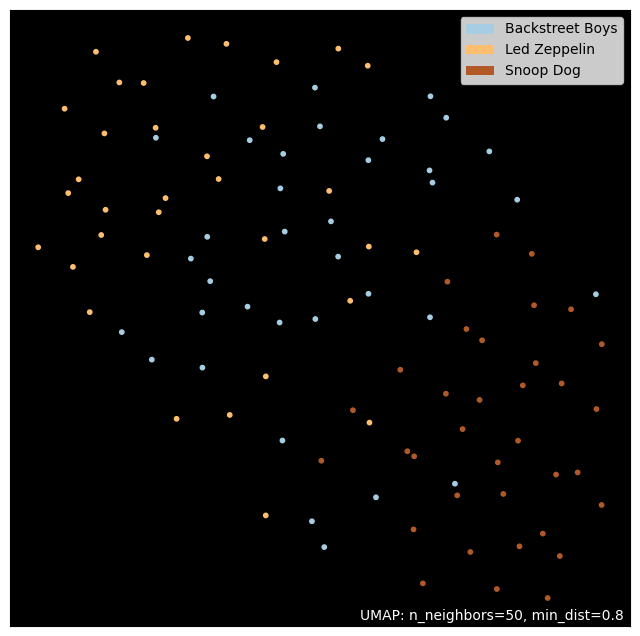

In [ ]:
for n in [5,15,50]:
  for dist in [0.1,0.5,0.8]:
    print(f'Liczba sąsiadów {n}, dystans {dist}')
    mapper = umap.UMAP(n_neighbors=n,min_dist=dist).fit(grouping_data)
    umap.plot.points(mapper, labels=pd.Series(autors), color_key_cmap='Paired', background='black')
    plt.show()

### Trenowanie modelu

In [ ]:
from gensim import utils

In [ ]:
corpus = np.vstack(all_clear_songs)

In [ ]:
corpus.shape

(105, 1)

In [ ]:
corpus[0]

array(['everybody grove to the music everybody jam  oh hey  weve been waiting so long just cant hold it back no more creepin up and down now its time for me to let it go if you really wanna see what we can do for you send the crazy wildin static sing it   jam on cuz backstreets got it come on now everybody weve got it goin on for years  weve got it goin on for years   well im creepin up on your left straight up funky when i get with you keep it ruthless when i get wet keep the party packed in my corner tough like granite to keep the crowd hype get up on this just to get right what you want it what you gonna get backstreets got the special effects uh  if you really wanna see what we can do for you oh ill send the crazy wildin static sing it   weve got it goin on for years   weve been waiting so long just cant hold it back no more just cant hold it back no more creepin up and down now its time for me to let it go   jam on jam on  everybody groove to the music everybody jam   weve got it 

In [ ]:
class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus = all_clear_songs
        for song in corpus:
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(song)

In [ ]:
vocab_corpus = MyCorpus()

In [ ]:
# Budowanie od zera
model = gensim.models.Word2Vec(sentences=vocab_corpus)

In [ ]:
model.wv['babe']

array([-0.14231698,  0.19186243,  0.01652545, -0.04956602,  0.23874708,
       -0.6468081 ,  0.30503526,  0.6732512 , -0.38065648, -0.26689515,
       -0.00102243, -0.22991014, -0.16462237,  0.1649941 ,  0.14133479,
       -0.06304893,  0.1406513 , -0.06280053, -0.28111914, -0.26612806,
        0.04823504, -0.02721926,  0.06515387, -0.1610781 , -0.11539575,
        0.00357032,  0.00229793, -0.36710852, -0.21711707,  0.1215845 ,
        0.35672846,  0.00941749, -0.02868935, -0.30968463, -0.11074036,
        0.26077804,  0.10667554, -0.23787491,  0.12059192, -0.37825906,
        0.03506933, -0.385339  ,  0.20507337,  0.12392651,  0.2298729 ,
       -0.11156324, -0.24556212,  0.07024053,  0.40661165,  0.01467878,
        0.30119222, -0.22794552,  0.09856912, -0.0392671 , -0.2655887 ,
        0.33677936,  0.10445782,  0.13608591, -0.34242442,  0.18815273,
        0.27190793,  0.24216177, -0.12643526,  0.00490698, -0.10656894,
        0.32858005, -0.10455567,  0.0941499 , -0.24867234,  0.16

## Zadanie 

Sprawdź jak utwory zostaną pogrupowane przy użyciu nowego modelu wektoryzującego tekst

## Dotrenowanie modelu

In [ ]:
new_sentences = api.load("text8")  # load dataset as iterable

[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:
model.build_vocab(new_sentences, update=True)

In [ ]:
model.train(new_sentences, total_examples=model.corpus_count, epochs=model.epochs)

(62532436, 85026035)

In [ ]:
model.wv['babe']

array([ 0.92429173,  0.4404317 , -0.9420355 ,  0.16009302, -0.4259399 ,
        0.8753588 ,  0.39864984,  0.5644235 ,  0.10050616, -0.7937138 ,
       -0.13028997, -0.1590935 , -0.04388459,  0.015875  ,  0.37513378,
       -0.34504333,  0.21400873,  0.06315587, -0.8178508 ,  0.58390135,
       -0.21066839,  0.5546436 , -0.2959483 ,  0.21254574,  0.62131184,
       -0.996008  ,  0.1719893 , -0.7972023 , -0.35050103,  0.06311144,
        1.6098343 , -0.5160851 , -0.81908476,  0.485287  ,  0.08315668,
        0.35483304, -0.07625119, -0.1960328 , -0.52446884, -0.7078108 ,
        0.03568714, -0.5245932 ,  0.8889188 , -0.41993427, -0.29095843,
        0.8179127 , -1.0096307 , -0.14927773,  0.01484515, -0.23889737,
        1.0017543 , -0.86199754, -0.0824856 , -0.43460786,  0.57959396,
       -0.29415873,  0.89701325, -0.14991733, -0.4896234 , -0.83137   ,
        0.64070094,  0.13691366,  0.017797  ,  0.12334583, -0.99881417,
       -0.73699176,  0.20512725,  0.53174144, -0.7172447 ,  1.02

# Klasyfikacja tekstu + Analiza sentymentu

In [5]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [6]:
%cd /content/gdrive/My Drive/AI_datasets

/content/gdrive/My Drive/AI_datasets


https://ai.stanford.edu/~amaas/data/sentiment/

In [11]:
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file("aclImdb_v1", url,
#                                     untar=True, cache_dir='.',
#                                     cache_subdir='')
# dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

# train_dir = os.path.join(dataset_dir, 'train')
# remove_dir = os.path.join(train_dir, 'unsup')
# shutil.rmtree(remove_dir)

84125825/84125825 [==============================] - 1s 0us/step


In [ ]:
!unzip aclImdb_mini.zip

In [6]:
train_dir = os.path.join('aclImdb_mini','train')

In [7]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [8]:
batch_size = 32
seed = 42


In [9]:

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb_mini/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 4002 files belonging to 2 classes.
Using 3202 files for training.


In [10]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Gespenster" Question of to be cool in the German cinema<br /><br />There are not many German films in the last ten years, who have made me so interest. Yes, the problem of the most German films are in this film "Gespenster" too. He is on some places to uncooked to be good to see. Special the figure of Toni (Sabine Timento) is too cool. But thats is in German films always so. Everybody must to learns this coolne\xc3\x9f - is the realism in this films. Thats difficult to understand. But in this case it makes some sense, because she steals and she lies - she is the kind of girl is better you never love it, because you lose it. Thats not clear for the other girl Nina in this film. She love her - and she would lose her. But Nina lost everything. She will play with soft emotion and a sad feeling. There is no way - but you must take it said Herbert Achterbusch for twenty years. Thats so often the way it goes in German films. Why? Nina (Julia Hummer) is not inside of the laws of soci

In [11]:
raw_train_ds.class_names

['neg', 'pos']

In [12]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb_mini/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 4002 files belonging to 2 classes.
Using 800 files for validation.


In [13]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [14]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [15]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [16]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [17]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'In Manhattan, the American middle class Jim Blandings (Cary Grant) lives with his wife Muriel (Myrna Loy) and two teenage daughters in a four bedroom and one bathroom only leased apartment. Jim works in an advertising agency raising US$ 15,000.00 a year and feels uncomfortable in his apartment due to the lack of space. When he sees an advertisement of a huge house for sale in the country of Connecticut for an affordable price, he drives with his wife and the real estate agent and decides to buy the old house without any technical advice. His best friend and lawyer Bill Cole (Melvyn Douglas) sends an acquaintance engineer to inspect the house, and the man tells that he should put down the house and build another one. Jim checks the information with other engineers and all of them condemn the place and sooner he finds that he bought a "money pit" instead of a dream house.<br /><br />"Mr. Blandings Builds his Own House" is an extremely funny comedy, with witty lines and

In [18]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  accent
 313 --->  during
Vocabulary size: 10000


In [19]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
embedding_dim = 16

In [22]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0),'AUC'])

In [24]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
101/101 [==============================] - 37s 338ms/step - loss: 0.6916 - binary_accuracy: 0.5628 - auc: 0.5442 - val_loss: 0.6903 - val_binary_accuracy: 0.6812 - val_auc: 0.6749
Epoch 2/10
101/101 [==============================] - 1s 14ms/step - loss: 0.6853 - binary_accuracy: 0.6943 - auc: 0.6725 - val_loss: 0.6839 - val_binary_accuracy: 0.7000 - val_auc: 0.7405
Epoch 3/10
101/101 [==============================] - 1s 10ms/step - loss: 0.6730 - binary_accuracy: 0.7683 - auc: 0.7760 - val_loss: 0.6725 - val_binary_accuracy: 0.7312 - val_auc: 0.7756
Epoch 4/10
101/101 [==============================] - 1s 12ms/step - loss: 0.6534 - binary_accuracy: 0.7983 - auc: 0.8273 - val_loss: 0.6561 - val_binary_accuracy: 0.7412 - val_auc: 0.7975
Epoch 5/10
101/101 [==============================] - 1s 12ms/step - loss: 0.6275 - binary_accuracy: 0.8248 - auc: 0.8642 - val_loss: 0.6360 - val_binary_accuracy: 0.7513 - val_auc: 0.8122
Epoch 6/10
101/101 [==============================] -

In [25]:
history_dict = history.history

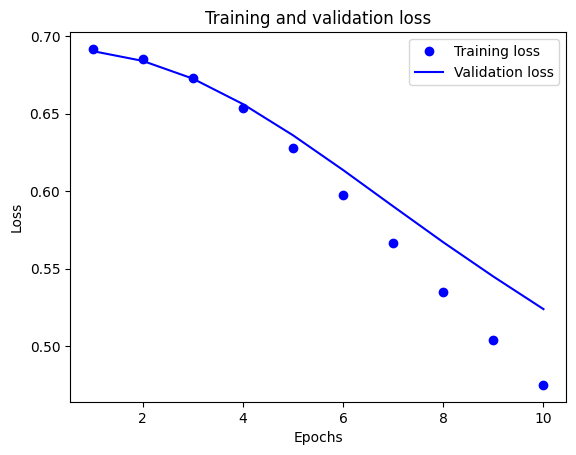

In [29]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
auc = history_dict['auc']
val_auc = history_dict['val_auc']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

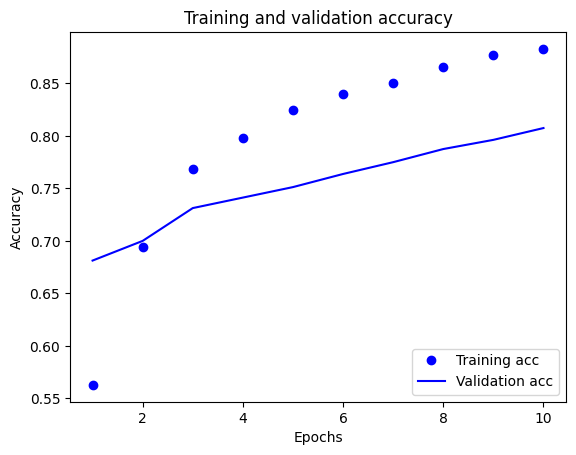

In [30]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

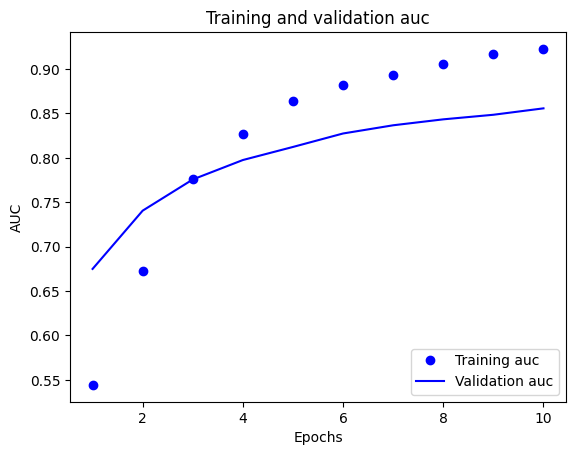

In [31]:
plt.plot(epochs, auc, 'bo', label='Training auc')
plt.plot(epochs, val_auc, 'b', label='Validation auc')
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend(loc='lower right')

plt.show()

In [32]:
model.layers

In [33]:
embedding_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[2].output)

In [34]:
val_ds_embeddings = embedding_model.predict(val_ds)

25/25 [==============================] - 0s 1ms/step


In [35]:
val_ds_embeddings.shape

(800, 16)

In [36]:
val_ds_embeddings[0]

array([ 0.03852865, -0.04453323,  0.03340705, -0.01816497, -0.01970732,
       -0.02866504, -0.02506191,  0.0379137 ,  0.02224887,  0.02259046,
       -0.04285887, -0.03689744, -0.02728504,  0.02177968,  0.02439201,
       -0.03948953], dtype=float32)

In [37]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=50e777dafb86275b2d254d4dac0ac95c967a98d93f57885972bdbeb4739a638f
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=31f39ad79d956df6704d580d3619b463ef3be223784a47dbd78fe1c448ff6828
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [40]:
import umap
import umap.plot

In [41]:
import pandas as pd
import numpy as np

In [42]:
labels = []
for _,l in val_ds:
    labels.extend(l.numpy())

In [43]:
mapper = umap.UMAP().fit(val_ds_embeddings)

In [44]:
hover_data = pd.DataFrame({'index':np.arange(len(labels)),
                           'label':labels})

In [45]:
umap.plot.output_notebook()

In [46]:
p = umap.plot.interactive(mapper, labels=pd.Series(labels), hover_data=hover_data, point_size=10, color_key_cmap='Paired', background='black')
umap.plot.show(p)

## Klasyfikacja z Dwustronną siecią RNN

In [65]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [66]:
max_features = 10000
sequence_length = 250

rnn_vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    # max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)
rnn_vectorize_layer.adapt(train_text)

In [67]:
embedding_dim = 16

In [68]:
model_birnn = tf.keras.Sequential([
    rnn_vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=max_features + 1, 
        output_dim=embedding_dim,
        mask_zero=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [69]:
model_birnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 250, 16)           160016    
                                                                 
 dropout_2 (Dropout)         (None, 250, 16)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [70]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model_birnn.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 3s 3s/step
[-0.0049484]


In [71]:
model_birnn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', 'AUC'])

In [72]:
history = model_birnn.fit(
    raw_train_ds,
    epochs=10,
    validation_data=raw_val_ds)

Epoch 1/10
101/101 [==============================] - 64s 530ms/step - loss: 0.6931 - accuracy: 0.5044 - auc: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.4825 - val_auc: 0.5034
Epoch 2/10
101/101 [==============================] - 29s 286ms/step - loss: 0.6923 - accuracy: 0.5044 - auc: 0.5120 - val_loss: 0.6922 - val_accuracy: 0.4825 - val_auc: 0.5560
Epoch 3/10
101/101 [==============================] - 18s 181ms/step - loss: 0.6886 - accuracy: 0.5044 - auc: 0.5773 - val_loss: 0.6662 - val_accuracy: 0.4825 - val_auc: 0.6330
Epoch 4/10
101/101 [==============================] - 17s 165ms/step - loss: 0.6545 - accuracy: 0.5231 - auc: 0.7692 - val_loss: 0.5901 - val_accuracy: 0.6425 - val_auc: 0.7290
Epoch 5/10
101/101 [==============================] - 12s 119ms/step - loss: 0.4693 - accuracy: 0.7673 - auc: 0.8250 - val_loss: 0.5014 - val_accuracy: 0.7713 - val_auc: 0.7954
Epoch 6/10
101/101 [==============================] - 12s 120ms/step - loss: 0.3535 - accuracy: 0.8335 - auc: 0.887

In [91]:
# predict on a sample text without padding.

sample_text = ('The movie was awesome. I liked everything. I will recommend this movie.')
predictions = model_birnn.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[0.44935554]


In [92]:
tf.keras.activations.sigmoid(predictions)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.610486]], dtype=float32)>

In [93]:
# predict on a sample text without padding.

sample_text = ('I would not say that move was awesome. Nothing to like. I will never recommend this movie.')
predictions = model_birnn.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 0s 58ms/step
[-0.04596623]


In [94]:
tf.keras.activations.sigmoid(predictions)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.48851046]], dtype=float32)>

In [74]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.9871199369430542)

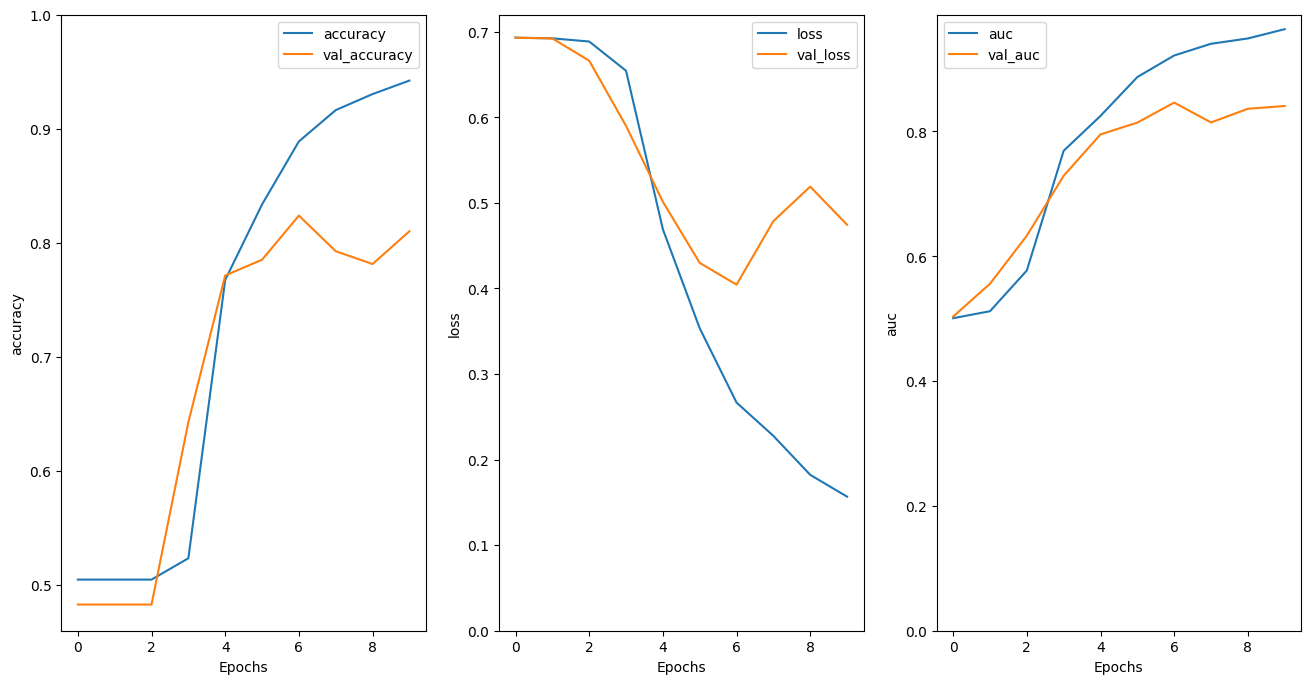

In [75]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 3, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.subplot(1, 3, 3)
plot_graphs(history, 'auc')
plt.ylim(0, None)

In [76]:
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [96]:
import io

In [97]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

Wejdź w [link](http://projector.tensorflow.org/?hl=pl&_gl=1*1ns1v5s*_ga*NTI4OTI3NjMyLjE2NzY4MzM0NTg.*_ga_W0YLR4190T*MTY4NTU0NzM3MC4yNS4xLjE2ODU1NDc1NTguMC4wLjA.) i wrzuć stworzone pliki tsv do ich wizualizacji.

# Zadanie

Wytrenuj model na podstawie wpisów w github z użyciem głębokich sieci oraz sieci rekurencyjnych wykorzystując moduł earlystopping. 